In [136]:
import pytorch_warmup as warmup
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [150]:
model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# factor = 0.6warmup_
# scheduler1 = torch.optim.lr_scheduler.LambdaLR(optimizer, lambda epoch: (1 + epoch) * factor ** (warmup_epochs - epoch))
scheduler1 = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.01, end_factor=1.0, total_iters=5)
scheduler2 = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[scheduler1, scheduler2], milestones=[warmup_epochs - 1])
lrs = []

for epoch in range(30):
    lrs.append(optimizer.param_groups[0]['lr'])
    optimizer.step()
    scheduler.step()

In [153]:
model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

factor = 0.4
scheduler1 = torch.optim.lr_scheduler.LambdaLR(optimizer, lambda epoch: (1 + epoch) * factor ** (warmup_epochs - epoch))
# scheduler1 = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.01, end_factor=1.0, total_iters=5)
scheduler2 = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[scheduler1, scheduler2], milestones=[warmup_epochs - 1])
lrs2 = []

for epoch in range(30):
    lrs2.append(optimizer.param_groups[0]['lr'])
    optimizer.step()
    scheduler.step()

/global/home/users/mariia/miniforge3/envs/astro/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:232: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


In [162]:
model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

start = 1e-5
end = 1e-3
steps = 5
factor = (end / start) ** (1 / (steps - 1))

scheduler1 = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=factor)
scheduler2 = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[scheduler1, scheduler2], milestones=[warmup_epochs])
lrs3 = []

for epoch in range(30):
    lrs3.append(optimizer.param_groups[0]['lr'])
    optimizer.step()
    scheduler.step()

In [156]:
lrs[:5]

[1e-05, 0.000208, 0.00040599999999999995, 0.0006039999999999999, 0.001]

In [157]:
lrs2[:5]

[1.0240000000000004e-05,
 5.120000000000001e-05,
 0.00019200000000000006,
 0.0006400000000000002,
 0.001]

In [164]:
lrs3[:7]

[1e-05,
 3.1622776601683795e-05,
 0.00010000000000000002,
 0.000316227766016838,
 0.0010000000000000002,
 1e-05,
 9e-06]

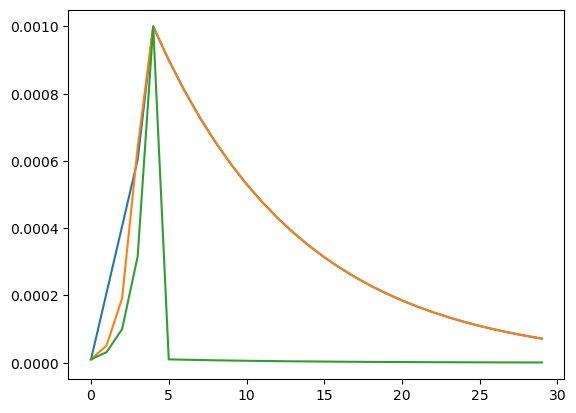

In [167]:
plt.plot(lrs)
plt.plot(lrs2)
plt.plot(lrs3)

In [132]:
warmup_epochs = 5
base_lr = 1e-3
warmup_factor = 1e-5
lrs = []

model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=base_lr)
warmup = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=warmup_factor, end_factor=1, total_iters=warmup_epochs)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [133]:
for epoch in range(30):
    optimizer.step()

    if epoch < warmup_epochs:
        warmup.step()
    else:
        scheduler.step()
        
    lrs.append(optimizer.param_groups[0]['lr'])

In [134]:
lrs

[0.000200008,
 0.000400006,
 0.000600004,
 0.000800002,
 0.001,
 0.0009000000000000001,
 0.0008100000000000001,
 0.000729,
 0.0006561000000000001,
 0.00059049,
 0.000531441,
 0.0004782969,
 0.00043046721,
 0.000387420489,
 0.0003486784401,
 0.00031381059609000004,
 0.00028242953648100003,
 0.00025418658283290005,
 0.00022876792454961005,
 0.00020589113209464906,
 0.00018530201888518417,
 0.00016677181699666576,
 0.0001500946352969992,
 0.0001350851717672993,
 0.00012157665459056936,
 0.00010941898913151243,
 9.847709021836118e-05,
 8.862938119652506e-05,
 7.976644307687256e-05,
 7.17897987691853e-05]

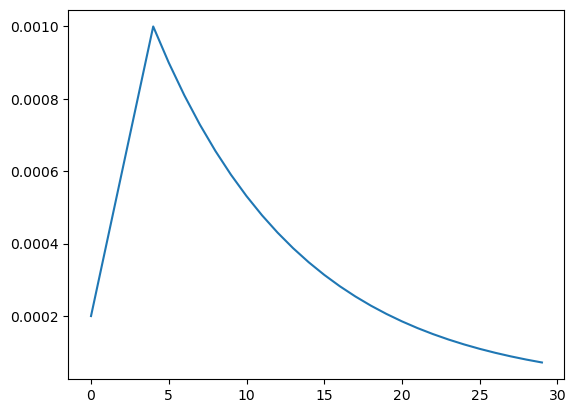

In [135]:
plt.plot(lrs)

In [25]:
model = torch.nn.Linear(10, 32)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [28]:
warmup_period = 5
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
warmup_scheduler = warmup.LinearWarmup(optimizer, warmup_period)
lrs1, lrs2, lrs3 = [], [], []

for epoch in range(30):
    with warmup_scheduler.dampening():
        if warmup_scheduler.last_step + 1 >= warmup_period:
            lr_scheduler.step()
            
        lrs1.append(optimizer.param_groups[0]['lr'])
        lrs2.append(lr_scheduler.get_last_lr()[0])
        lrs3.append(warmup_scheduler.last_step)

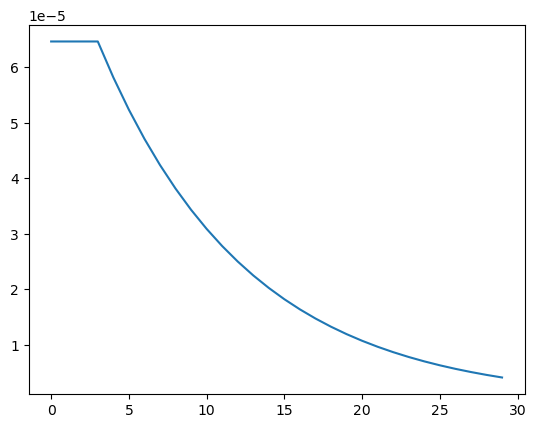

In [29]:
plt.plot(lrs1)

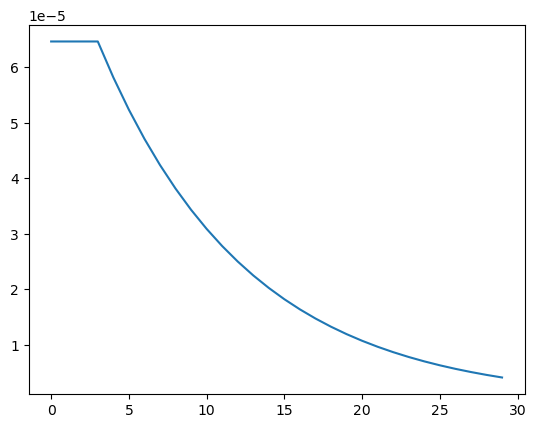

In [30]:
plt.plot(lrs2)

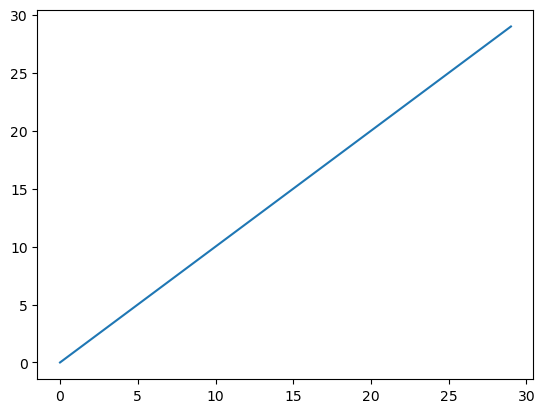

In [31]:
plt.plot(lrs3)